<a href="https://colab.research.google.com/github/Ipshita-Tandon/AI-Ml2023/blob/main/multi-dodality%20on%20gujrati%20digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/Nikunj1729/free-spoken-gujarati-digit-dataset

Cloning into 'free-spoken-gujarati-digit-dataset'...
remote: Enumerating objects: 3340, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 3340 (delta 11), reused 7 (delta 1), pack-reused 3312 (from 1)
Receiving objects: 100% (3340/3340), 282.13 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (1317/1317), done.
Updating files: 100% (1959/1959), done.


In [3]:
cd free-spoken-gujarati-digit-dataset/

/content/free-spoken-gujarati-digit-dataset


In [4]:
# Feature extraction methods

def CalculateZeroCrossingRate(file_location):
    y, sr = librosa.load(file_location)
    zCross = librosa.feature.zero_crossing_rate(y=y)
    dim = (32, 32)
    resized = cv2.resize(zCross, dim, interpolation = cv2.INTER_AREA)
    return resized

def CalculateMelSpectrogram(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.melspectrogram(y=y, sr=sr)
    melSpec_dB = librosa.power_to_db(melSpec)
    dim = (32, 32)
    resized = cv2.resize(melSpec_dB, dim, interpolation = cv2.INTER_AREA)
    return resized


def CalculateMFCC(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.mfcc(y=y, sr=sr)
    dim = (32, 32)
    resized = cv2.resize(melSpec, dim, interpolation = cv2.INTER_AREA)
    return resized

In [12]:
import os
import numpy as np

# Define the dataset directory
files_path = '/content/free-spoken-gujarati-digit-dataset'

# Create a directory for processed data if it doesn't exist
if not os.path.exists("processed_data"):
    os.mkdir("processed_data")

x = []  # Feature array
y = []  # Labels
Total = 23500  # Total expected files (adjust if needed)
count = 0

# Loop through the region directories dynamically
for region_dir in os.listdir(files_path):
    region_path = os.path.join(files_path, region_dir)

    # Skip files, only process directories
    if not os.path.isdir(region_path):
        continue

    for speaker_dir in os.listdir(region_path):
        speaker_path = os.path.join(region_path, speaker_dir)

        # Skip unnecessary system files
        if ".DS_" in speaker_dir or not os.path.isdir(speaker_path):
            continue

        for audio_file in os.listdir(speaker_path):
            if ".DS_" in audio_file or not audio_file.endswith(".wav"):
                continue

            print(count, audio_file)

            # Compute zero-crossing rate (replace with your actual function)
            x.append(CalculateZeroCrossingRate(os.path.join(speaker_path, audio_file)))

            # Extract label from filename (adjust as per naming convention)
            y.append(int(audio_file.split("D")[1][0]))

            count += 1

        # Periodic progress updates
        if count % 300 == 0:
            print(f"Remaining files: {Total - count}")

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Save the processed arrays
np.save(os.path.join(files_path, "X_zero_crossing_rate.npy"), x)
np.save(os.path.join(files_path, "y_zero_crossing_rate.npy"), y)

print("Processing complete. Arrays saved.")


0 R2S3T8D7.wav
1 R2S3T2D7.wav
2 R2S3T1D6.wav
3 R2S3T5D1.wav
4 R2S3T7D9.wav
5 R2S3T7D5.wav
6 R2S3T5D7.wav
7 R2S3T6D3.wav
8 R2S3T9D9.wav
9 R2S3T8D2.wav
10 R2S3T8D9.wav
11 R2S3T2D2.wav
12 R2S3T8D4.wav
13 R2S3T4D9.wav
14 R2S3T4D0.wav
15 R2S3T1D4.wav
16 R2S3T9D2.wav
17 R2S3T6D7.wav
18 R2S3T2D0.wav
19 R2S3T3D3.wav
20 R2S3T5D4.wav
21 R2S3T2D9.wav
22 R2S3T9D4.wav
23 R2S3T7D7.wav
24 R2S3T6D1.wav
25 R2S3T4D2.wav
26 R2S3T9D3.wav
27 R2S3T4D8.wav
28 R2S3T10D9.wav
29 R2S3T9D0.wav
30 R2S3T1D1.wav
31 R2S3T9D8.wav
32 R2S3T3D1.wav
33 R2S3T10D1.wav
34 R2S3T5D6.wav
35 R2S3T6D2.wav
36 R2S3T1D2.wav
37 R2S3T4D3.wav
38 R2S3T3D8.wav
39 R2S3T7D6.wav
40 R2S3T7D3.wav
41 R2S3T7D0.wav
42 R2S3T7D4.wav
43 R2S3T5D0.wav
44 R2S3T3D2.wav
45 R2S3T1D3.wav
46 R2S3T3D5.wav
47 R2S3T1D8.wav
48 R2S3T9D6.wav
49 R2S3T9D5.wav
50 R2S3T6D0.wav
51 R2S3T3D6.wav
52 R2S3T10D5.wav
53 R2S3T5D8.wav
54 R2S3T6D8.wav
55 R2S3T5D5.wav
56 R2S3T10D3.wav
57 R2S3T6D6.wav
58 R2S3T10D6.wav
59 R2S3T3D4.wav
60 R2S3T3D9.wav
61 R2S3T2D4.wav
62 R2S3T4D6.w

In [11]:
!ls

 Audio_Classification   processed_data	    'R3 - South Zone'   README.md
 _config.yml	       'R1 - Central Zone'  'R4 - Saurashtra'   X_zero_crossing_rate.npy
 Contributors.md       'R2 - North Zone'    'R5 - Kutch'        y_zero_crossing_rate.npy


Directory /content/free-spoken-gujarati-digit-dataset/R1 not found. Skipping.
Directory /content/free-spoken-gujarati-digit-dataset/R2 not found. Skipping.
Directory /content/free-spoken-gujarati-digit-dataset/R3 not found. Skipping.
Directory /content/free-spoken-gujarati-digit-dataset/R4 not found. Skipping.
Directory /content/free-spoken-gujarati-digit-dataset/R5 not found. Skipping.


In [8]:
!ls

 Audio_Classification   Contributors.md  'R1 - Central Zone'  'R3 - South Zone'  'R5 - Kutch'
 _config.yml	        processed_data	 'R2 - North Zone'    'R4 - Saurashtra'   README.md


In [13]:
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [16]:
files_path = '/content/free-spoken-gujarati-digit-dataset'

x = np.load(files_path+"/X_zero_crossing_rate.npy", allow_pickle=True)
y = np.load(files_path+"/y_zero_crossing_rate.npy", allow_pickle=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
np.save(files_path+"/x_mfcc_train",x_train)
np.save(files_path+"/y_mfcc_train",y_train)
np.save(files_path+"/x_mfcc_test",x_test)
np.save(files_path+"/y_mfcc_test",y_test)

# Dono change this, not important

In [35]:
import tensorflow as tf
import numpy as np

files_path = '/content/free-spoken-gujarati-digit-dataset'

features = ['mel_spectrogram', 'mfcc', 'zero_crossing_rate']

x_train = np.load(files_path+"/x_{}_train.npy".format(features[1]), allow_pickle=True)
y_train = np.load(files_path+"/y_{}_train.npy".format(features[1]), allow_pickle=True)

x_test = np.load(files_path+"/x_{}_test.npy".format(features[1]),allow_pickle=True)
y_test = np.load(files_path+"/y_{}_test.npy".format(features[1]),allow_pickle=True)

In [21]:
x_train =x_train.reshape((x_train.shape[0],32,32,1))
x_test =x_test.reshape((x_test.shape[0],32,32,1))


In [22]:
# Train model
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
def GetCNN():
  model = models.Sequential()

  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Dropout(0.1))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))# fully connected
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.1))

  model.add(layers.Dense(10,activation='softmax', use_bias=True))
  return model

In [23]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y = label_as_binary.fit_transform(y_train)
test_y = label_as_binary.fit_transform(y_test)


In [28]:
model_path = '/content/drive/MyDrive/audd saved files/gujrati dataset/models'

from tensorflow.keras.callbacks import ModelCheckpoint
cnn_model = GetCNN()
print(cnn_model.summary())
cnn_model.compile(loss  = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
callbacks = ModelCheckpoint(model_path+"/{}_.keras".format(features[2]), monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True,
                                    verbose=1)

history = cnn_model.fit(x_train, train_y, batch_size=64, epochs=10, verbose=1, validation_split=0.1, callbacks=[callbacks]).history


import keras
zcr_model = keras.models.load_model(model_path+"/{}_.keras".format(features[2]))
print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

None
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.3278 - loss: 2.1030
Epoch 1: val_accuracy improved from -inf to 0.19872, saving model to /content/drive/MyDrive/audd saved files/gujrati dataset/models/zero_crossing_rate_.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - accuracy: 0.3318 - loss: 2.0873 - val_accuracy: 0.1987 - val_loss: 2.1144
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4680 - loss: 1.4365
Epoch 2: val_accuracy did not improve from 0.19872
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.4693 - loss: 1.4337 - val_accuracy: 0.1795 - val_loss: 2.2940
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.5399 - loss: 1.2168
Epoch 3: val_accuracy did not improve from 0.19872
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.5400 - loss: 1.2171 - val_accuracy: 0.1795 - val_loss: 2.3605
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.5655 - loss: 1.1836
Epoch 4: val_accuracy did not improve f

In [29]:
# save history
np.save(model_path+"/{}_history.npy".format(features[2]),history)
#print(history['accuracy'])

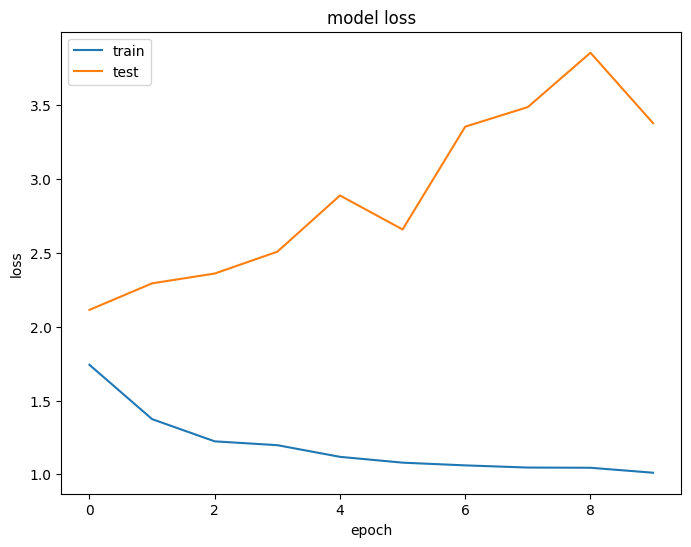

In [30]:
#plot history
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

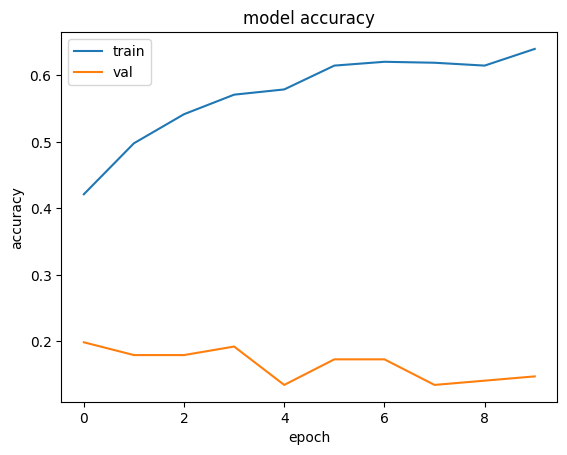

In [31]:
# Accuracy plot
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
# Load all models
import keras
model_path = '/content/drive/MyDrive/audd saved files/gujrati dataset/models'

# mp_model = keras.models.load_model(model_path+"/mel_spectrogram_.keras")
# mfcc_model = keras.models.load_model(model_path+"/mfcc_.keras")
zc_model = keras.models.load_model(model_path+"/zero_crossing_rate_.keras")

In [37]:
# Model Ensembling
from keras.models import Model
from keras import layers

def ensembleModels(models, model_input):
    # collect outputs of models in a list
    model_outputs=[model(model_input) for model in models]
    # averaging outputs
    ensemble_output=layers.average(model_outputs)
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=ensemble_output,    name='ensemble')

    return modelEns

In [42]:
# Ensembling
from keras.layers import Input
models=[mp_model,mfcc_model,zc_model]

model_input = Input(shape=models[0].input_shape[1:]) # c*h*w
modelEns = ensembleModels(models, model_input)
modelEns.summary()

modelEns.save(model_path+"/ensemble_.h5")

NameError: name 'mp_model' is not defined

In [43]:
# Ensembling
from keras.layers import Input
models=[zc_model]

model_input = Input(shape=models[0].input_shape[1:]) # c*h*w
modelEns = ensembleModels(models, model_input)
modelEns.summary()

modelEns.save(model_path+"/ensemble_.h5")

Model: "functional_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 10)                  │         175,242 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average (Average)                    │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

In [44]:
from sklearn.preprocessing import LabelBinarizer

def evaluateAll(model, x_test, test_y):
  label_as_binary = LabelBinarizer()
  test_y = label_as_binary.fit_transform(test_y)
  return model.evaluate(x_test,test_y)



In [45]:
#Test data
import keras
files_path = '/content/drive/MyDrive/audd saved files/gujrati dataset'

x_test = np.load(files_path+"/x_mel_spectrogram_test.npy",allow_pickle=True)
y_test = np.load(files_path+"/y_mel_spectrogram_test.npy",allow_pickle=True)

# model
model_path = '/content/drive/MyDrive/audd saved files/gujrati dataset/models'

mp_model = keras.models.load_model(model_path+"/mel_spectrogram_.h5")

model_result = evaluateAll(mp_model, x_test, y_test)
print(model_result)
print("model history ", mp_model.history)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/audd saved files/gujrati dataset/x_mel_spectrogram_test.npy'

In [47]:
#Test data
import keras
files_path = '/content/free-spoken-gujarati-digit-dataset'

x_test = np.load(files_path+"/x_mfcc_test.npy",allow_pickle=True)
y_test = np.load(files_path+"/y_mfcc_test.npy",allow_pickle=True)

# model
model_path = '/content/drive/MyDrive/audd saved files/gujrati dataset/models'

mp_model = keras.models.load_model(model_path+"/zero_crossing_rate_.keras")

model_result = evaluateAll(mp_model, x_test, y_test)
print(model_result)
print("model history ", mp_model.history)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.2121 - loss: 2.1192
[2.068112850189209, 0.22422680258750916]
model history  <keras.src.callbacks.history.History object at 0x7a9f4e257070>
